<a href="https://colab.research.google.com/github/bshekhar123/spam-mail-detection/blob/main/Email_Spam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [225]:
import numpy as np
import pandas as pd

In [226]:
df=pd.read_csv(r"/content/spam.csv", encoding='latin1')

In [227]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1245,ham,Hello which the site to download songs its urg...,NaN,NaN,NaN
169,ham,Yes :)it completely in out of form:)clark also...,NaN,NaN,NaN
5365,spam,Camera - You are awarded a SiPix Digital Camer...,NaN,NaN,NaN
2992,ham,So i'm doing a list of buyers.,NaN,NaN,NaN
756,ham,Cant think of anyone with * spare room off * t...,NaN,NaN,NaN


In [228]:
df.shape

(5572, 5)

In [229]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [230]:
## DATA CLEANING

## as there are 3 unnamed coloumns

## drop last 3 cols

df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [231]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [232]:
df.sample(5)

,v1,v2
4968,ham,I will cme i want to go to hos 2morow. After t...
4079,ham,"Sir, good morning. Hope you had a good weekend..."
4306,ham,I guess it is useless calling u 4 something im...
1833,ham,When should I come over?
4031,ham,I'm very happy for you babe ! Woo hoo party on...


In [233]:
df.rename(columns={'v1':'target', 'v2':'text'}, inplace=True)
df.sample(5)

,target,text
1197,ham,He also knows about lunch menu only da. . I know
4363,ham,So what about you. What do you remember
3822,ham,Please protect yourself from e-threats. SIB ne...
4555,ham,Gettin rdy to ship comp
3657,ham,R u here yet? I'm wearing blue shirt n black p...


In [234]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [235]:
df['target'] = encoder.fit_transform(df['target'])

In [236]:
encoder.fit_transform(df['target'])

array([0, 0, 1, ..., 0, 0, 0])

In [237]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [238]:
#missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [239]:
#check for duplicate values
df.duplicated().sum()

403

In [240]:
#remove duplicates
df= df.drop_duplicates(keep='first')

In [241]:
df.duplicated().sum()

0

In [242]:
df.shape

(5169, 2)

In [243]:
## EDA
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [244]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

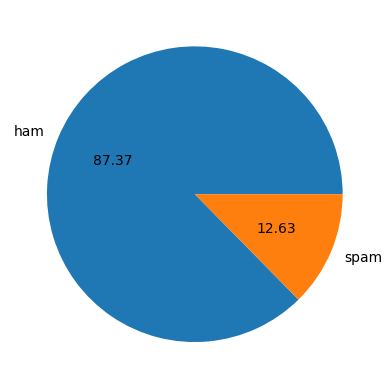

In [245]:
## for better representation

import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [246]:
## Data is imbalanced

In [247]:
pip install nltk

In [248]:
import nltk

In [249]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [250]:
df['num_characters']= df['text'].apply(len)

In [251]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [252]:
##number of words
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [253]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [254]:
df['no_of_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [255]:
df.head()

,target,text,num_characters,num_words,no_of_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [256]:
df[['num_characters','num_words','no_of_sentences']].describe()

,num_characters,num_words,no_of_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [257]:
## describe ham
df[df['target'] == 0][['num_characters','num_words','no_of_sentences']].describe()

,num_characters,num_words,no_of_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [258]:
## describe spam
df[df['target'] == 1][['num_characters','num_words','no_of_sentences']].describe()

,num_characters,num_words,no_of_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [259]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

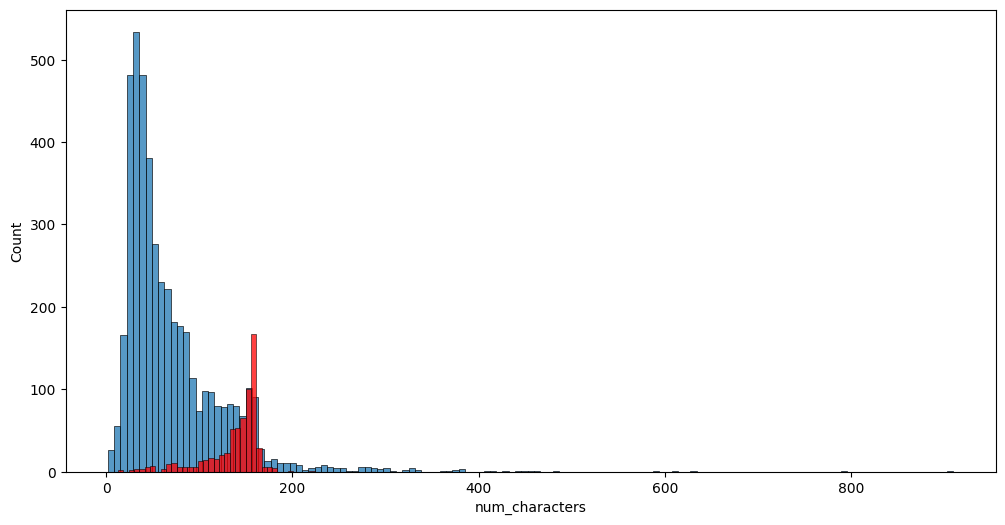

In [260]:
plt.figure(figsize=(12,6))

sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

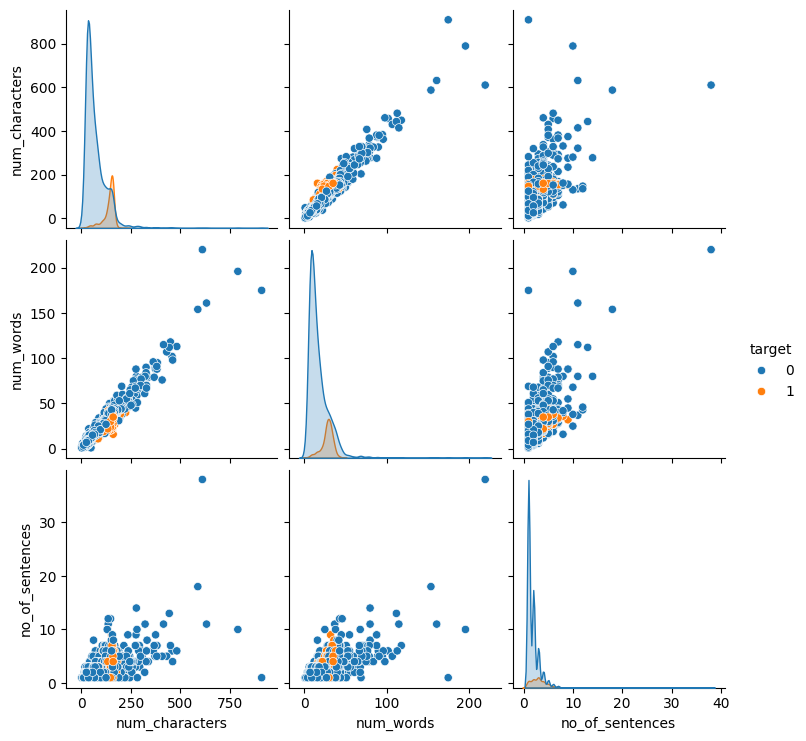

In [261]:
sns.pairplot(df,hue='target')

In [262]:
##TEXT PREPROCESSING

##creating a new function
import nltk

In [263]:
def transform_text(text):
   text=text.lower()
   text=nltk.word_tokenize(text)

   y=[]
   for i in text:
    if i.isalnum():
      y.append(i)

      text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)


            text = y[:]
            y.clear()

            for i in text:
              y.append(ps.stem(i))




   return " ".join(y)

In [264]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [265]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()


from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [266]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [267]:
transform_text('Okay name ur price as long as its legal! Wen can I pick them up? Y u ave x ams xx')

'okay name ur price long legal wen pick u ave x xx'

In [268]:
df['text'][100]

'Okay name ur price as long as its legal! Wen can I pick them up? Y u ave x ams xx'

In [269]:
df['transformed_text'] =df['text'].apply(transform_text)

In [270]:
df.head()

,target,text,num_characters,num_words,no_of_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [271]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [272]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

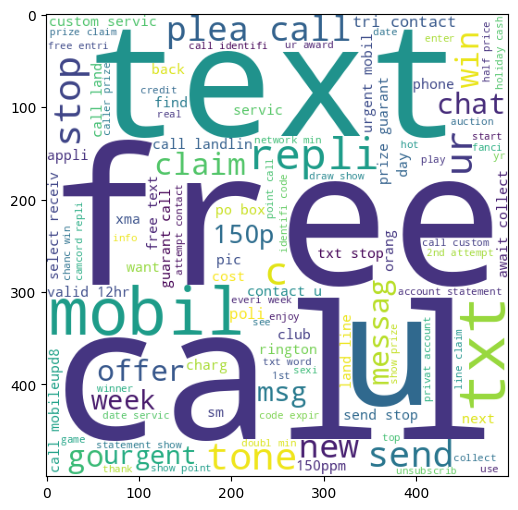

In [273]:
plt.figure(figsize=(15,6))

plt.imshow(spam_wc)

In [274]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

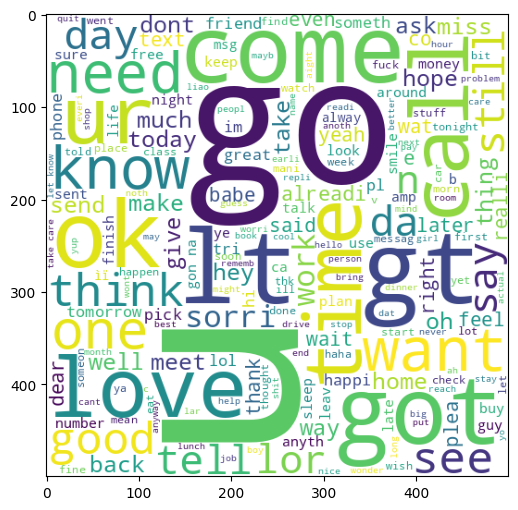

In [275]:
plt.figure(figsize=(15,6))

plt.imshow(ham_wc)

In [276]:
df.head()

,target,text,num_characters,num_words,no_of_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [277]:
## for spam

spam_corpus = []


for msg in df[df['target'] == 1]['transformed_text'].tolist():
   for word in msg.split():
        spam_corpus.append(word)

In [278]:
len(spam_corpus)

10308

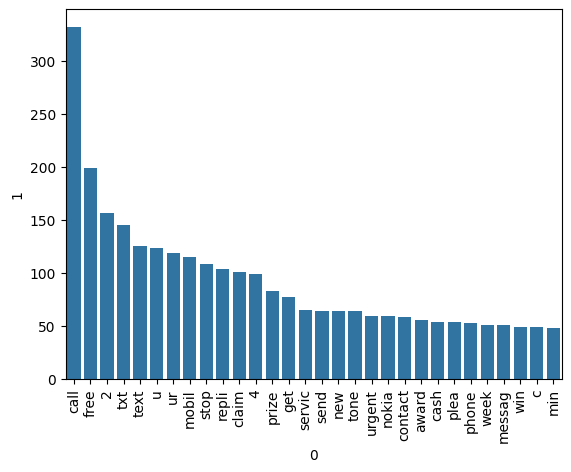

In [279]:
from collections import Counter



spam_counts = Counter(spam_corpus)
most_common_30 = spam_counts.most_common(30)
df_most_common = pd.DataFrame(most_common_30)

sns.barplot(x=df_most_common[0], y=df_most_common[1])
plt.xticks(rotation='vertical')
plt.show()

In [280]:
##for ham

ham_corpus = []


for msg in df[df['target'] == 0]['transformed_text'].tolist():
   for word in msg.split():
        ham_corpus.append(word)

In [281]:
len(ham_corpus)

36991

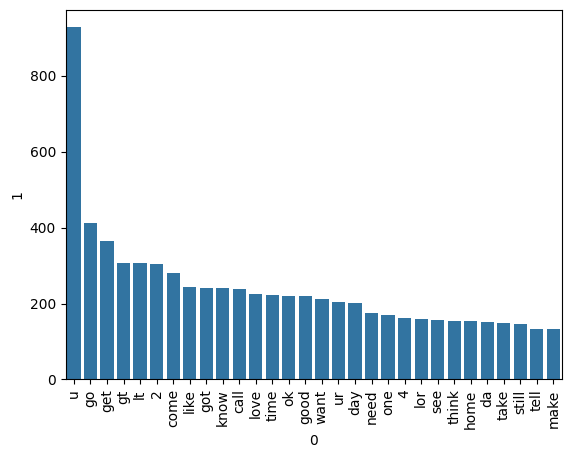

In [282]:
from collections import Counter



ham_counts = Counter(ham_corpus)
most_common_30 = ham_counts.most_common(30)
df_most_common = pd.DataFrame(most_common_30)

sns.barplot(x=df_most_common[0], y=df_most_common[1])
plt.xticks(rotation='vertical')
plt.show()

In [283]:
##MODEL BUILDING

from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)


In [284]:
X = cv.fit_transform(df['transformed_text']).toarray()


In [285]:
X.shape

(5169, 6817)

In [286]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X = scaler.fit_transform(X)

In [287]:
# appending the num_character col to X
#X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [288]:
X.shape

(5169, 6817)

In [289]:
y = df['target'].values

In [290]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [291]:
from sklearn.model_selection import train_test_split

In [292]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [293]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [294]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [295]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8839458413926499
[[796 100]
 [ 20 118]]
0.5412844036697247


In [296]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9642166344294004
[[872  24]
 [ 13 125]]
0.8389261744966443


In [297]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9680851063829787
[[892   4]
 [ 29 109]]
0.9646017699115044


In [298]:
X = tfidf.fit_transform(df['transformed_text']).toarray()


In [299]:
X.shape

(5169, 3000)

In [300]:
y = df['target'].values

In [301]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [302]:
from sklearn.model_selection import train_test_split

In [303]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [304]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [305]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [306]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8713733075435203
[[789 107]
 [ 26 112]]
0.5114155251141552


In [307]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9729206963249516
[[896   0]
 [ 28 110]]
1.0


In [308]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9816247582205029
[[894   2]
 [ 17 121]]
0.983739837398374


In [309]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [310]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [311]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [312]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

In [313]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9777562862669246, 0.9752066115702479)

In [314]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():

    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)

    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9777562862669246
Precision -  0.9752066115702479
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.9729206963249516
Precision -  1.0
For  DT
Accuracy -  0.9313346228239845
Precision -  0.8252427184466019
For  LR
Accuracy -  0.9564796905222437
Precision -  0.9603960396039604
For  RF
Accuracy -  0.9738878143133463
Precision -  1.0
For  AdaBoost
Accuracy -  0.9680851063829787
Precision -  0.9487179487179487
For  BgC
Accuracy -  0.9564796905222437
Precision -  0.8604651162790697
For  ETC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  GBDT
Accuracy -  0.9497098646034816
Precision -  0.93
For  xgb
Accuracy -  0.9661508704061895
Precision -  0.9401709401709402


In [315]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)


In [316]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.972921,1.000000
5,RF,0.973888,1.000000
0,SVC,0.977756,0.975207
8,ETC,0.975822,0.974790
4,LR,0.956480,0.960396
6,AdaBoost,0.968085,0.948718
10,xgb,0.966151,0.940171
9,GBDT,0.949710,0.930000
7,BgC,0.956480,0.860465


In [317]:
##Model Improve
# 1. Change the max_features parameter of TfIdf

In [318]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [319]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [320]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [321]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [322]:
new_df_scaled

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y
0,KN,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000
1,NB,0.972921,1.000000,0.972921,1.000000,0.972921,1.000000
2,RF,0.973888,1.000000,0.973888,1.000000,0.973888,1.000000
3,SVC,0.977756,0.975207,0.977756,0.975207,0.977756,0.975207
4,ETC,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790
5,LR,0.956480,0.960396,0.956480,0.960396,0.956480,0.960396
6,AdaBoost,0.968085,0.948718,0.968085,0.948718,0.968085,0.948718
7,xgb,0.966151,0.940171,0.966151,0.940171,0.966151,0.940171
8,GBDT,0.949710,0.930000,0.949710,0.930000,0.949710,0.930000
9,BgC,0.956480,0.860465,0.956480,0.860465,0.956480,0.860465


In [323]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [324]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000
1,NB,0.972921,1.000000,0.972921,1.000000,0.972921,1.000000,0.972921,1.000000
2,RF,0.973888,1.000000,0.973888,1.000000,0.973888,1.000000,0.973888,1.000000
3,SVC,0.977756,0.975207,0.977756,0.975207,0.977756,0.975207,0.977756,0.975207
4,ETC,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790
5,LR,0.956480,0.960396,0.956480,0.960396,0.956480,0.960396,0.956480,0.960396
6,AdaBoost,0.968085,0.948718,0.968085,0.948718,0.968085,0.948718,0.968085,0.948718
7,xgb,0.966151,0.940171,0.966151,0.940171,0.966151,0.940171,0.966151,0.940171
8,GBDT,0.949710,0.930000,0.949710,0.930000,0.949710,0.930000,0.949710,0.930000
9,BgC,0.956480,0.860465,0.956480,0.860465,0.956480,0.860465,0.956480,0.860465


In [326]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))